In [1]:
from hydra import initialize, compose
from pathlib import Path
import pandas as pd

from peekingduck.training.src.utils.general_utils import (
    create_dataframe_with_image_info,
    download_to,
    extract_file,
    return_list_of_files,
)

/opt/homebrew/Caskroom/miniforge/base/envs/train/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
train_dir: Path = Path("data/vegfru")
train_images = return_list_of_files(
    train_dir, extensions=[".jpg", ".png", ".jpeg"], return_string=False
)


In [7]:
len(train_images)

160731

In [17]:
df = pd.read_csv("data/vegfru/sub_classes.csv", delimiter=" ")

In [18]:
df['image_path'] = df["image_path"].astype(str).apply(lambda x: "/".join(["data","vegfru",x]))

In [19]:
df

,image_path,class_id
0,data/vegfru/veg200_images/Chinese_artichoke/v_...,13
1,data/vegfru/veg200_images/Chinese_artichoke/v_...,13
2,data/vegfru/veg200_images/Chinese_artichoke/v_...,13
3,data/vegfru/veg200_images/Chinese_artichoke/v_...,13
4,data/vegfru/veg200_images/Chinese_artichoke/v_...,13
...,...,...
43795,data/vegfru/fru92_images/yacon/f_08_02_0146.jpg,24
43796,data/vegfru/fru92_images/yacon/f_08_02_0147.jpg,24
43797,data/vegfru/fru92_images/yacon/f_08_02_0148.jpg,24
43798,data/vegfru/fru92_images/yacon/f_08_02_0149.jpg,24


In [20]:
df['class_name'] = df["image_path"].astype(str).apply(lambda x: Path(x).parent.name)

In [21]:
df["class_name"].value_counts()

Chinese_artichoke    150
viola_philippica     150
zucchini             150
zizania_aquatica     150
zha-tsai             150
                    ... 
horst                150
hericium             150
hen-of-the-woods     150
head_cabbage         150
yacon                150
Name: class_name, Length: 292, dtype: int64

In [22]:
df["image_path"][0]

'data/vegfru/veg200_images/Chinese_artichoke/v_14_01_0001.jpg'

In [25]:
df.sort_values(by="class_id", inplace=True)

In [28]:
df.head(50)

,image_path,class_id,class_name
5311,data/vegfru/veg200_images/chive/v_01_02_0012.jpg,0,chive
8017,data/vegfru/veg200_images/garlic_chive/v_01_04...,0,garlic_chive
8016,data/vegfru/veg200_images/garlic_chive/v_01_04...,0,garlic_chive
8015,data/vegfru/veg200_images/garlic_chive/v_01_04...,0,garlic_chive
8014,data/vegfru/veg200_images/garlic_chive/v_01_04...,0,garlic_chive
8013,data/vegfru/veg200_images/garlic_chive/v_01_04...,0,garlic_chive
8012,data/vegfru/veg200_images/garlic_chive/v_01_04...,0,garlic_chive
8018,data/vegfru/veg200_images/garlic_chive/v_01_04...,0,garlic_chive
8011,data/vegfru/veg200_images/garlic_chive/v_01_04...,0,garlic_chive
8009,data/vegfru/veg200_images/garlic_chive/v_01_04...,0,garlic_chive


<AxesSubplot: >

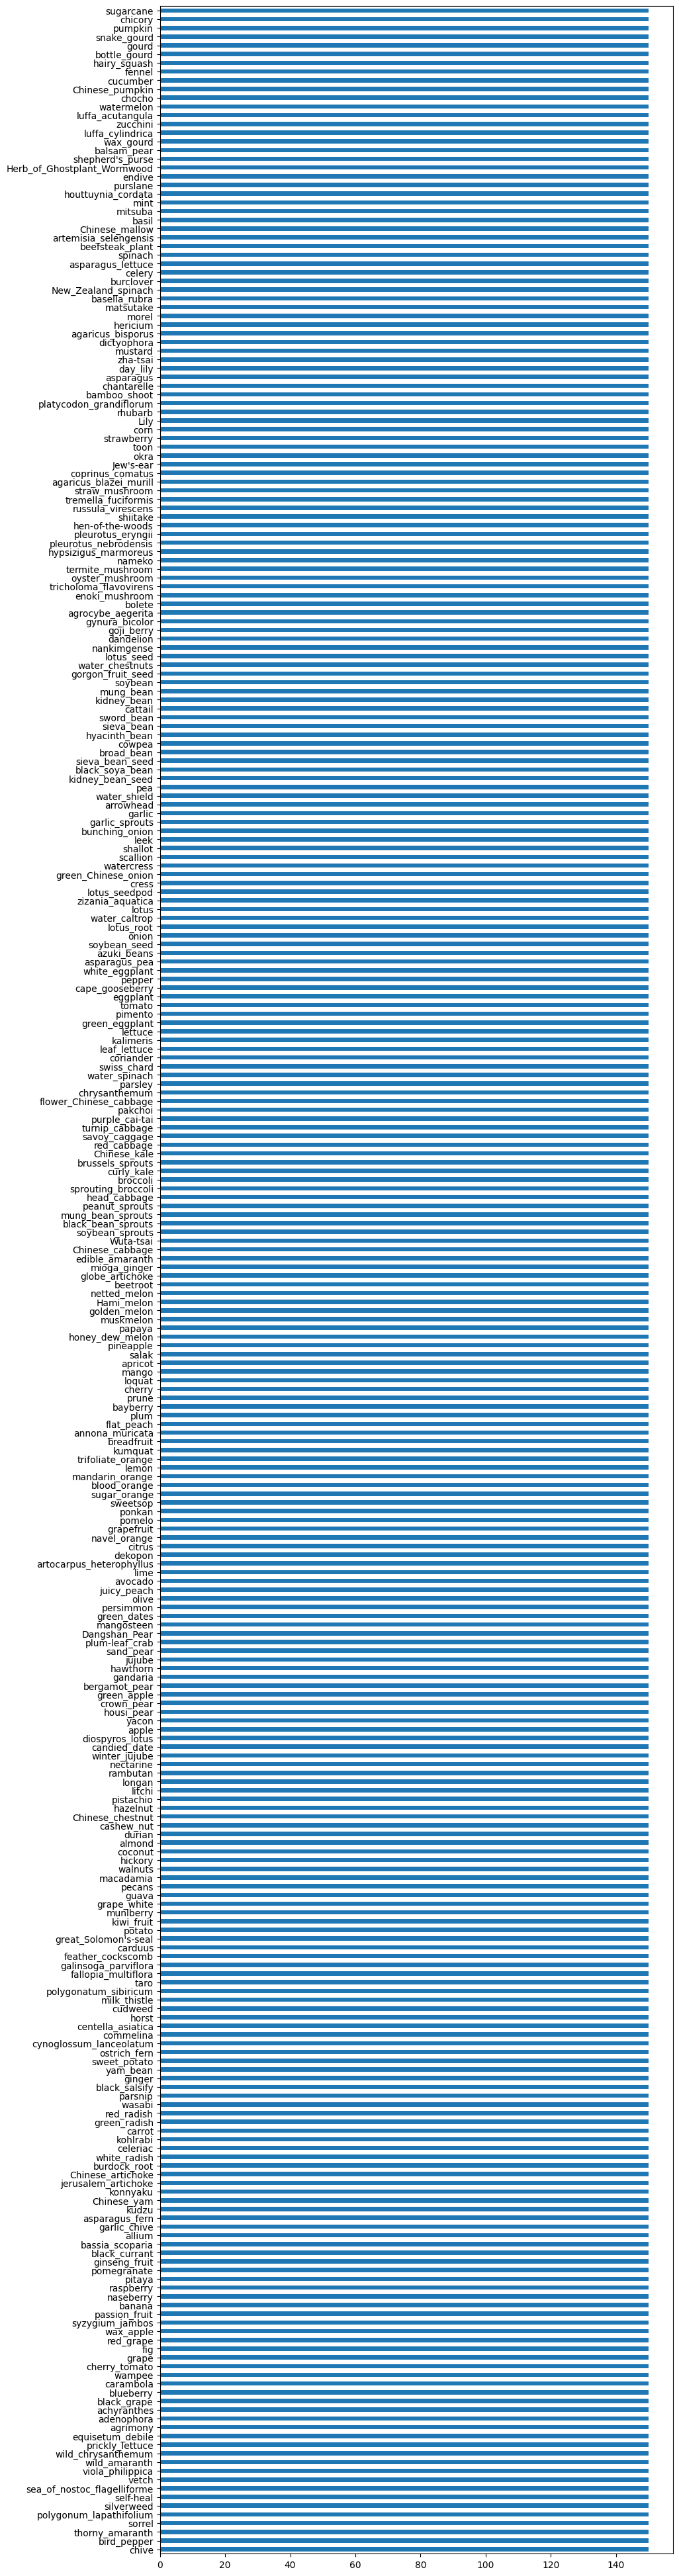

In [29]:
df["class_name"].value_counts().plot(kind='barh',figsize=(10,50))


In [27]:
df.to_csv('train.csv', index=False)